# Coursework 2


Author: Javier Ramirez

Date: 13/01/2020

## Introduction

On the first coursework of this class, I created and trained an Artifical Neural Network to perform multiclass classification on the Keras Fashion-MNIST database. After experimenting with different hyper-parameter values, the ANN was optimized to achieve the most accurate training possible. In the end, the highest test accuracy obtained was 89%. Although this proved substantial improvement from the first test results, we came to the conclusion that the model used was not ideal for the type of task we assigned to it, as an accuracy of 89% would not be reliable enough for any real applications.

This second coursework will be a continuation of the first one, and our goal of creating a model that achieves the highest accuracy possible remains the same. However, this time, the problem will be addressed differently and we will use a network model we learned on the second part of the class in order to achieve better results.

### Report Structure

- Introduction
    - Report Structure
    - Goal
    - Dataset
    - Methodology
- Methods
    - Dependencies
    - Data Preprocessing
        - Data Loading
        - Data Reshaping and Value Normalization
        - Categorical Encoding
        - Validation Data
    - Model Testing
        - Model 1
        - Model 2
        - Model 3
        - Model 4
        - Model 5
        - Model 6
        - Model 7
        - Model 8
        - Model 9
        - Model 10
        - Model 11
        - Model 12
- Results        
- Evaluation

### Goal

Our goal for this coursework will be to create a model that achieves a higher test accuracy than the model from the previous coursework, and therefore prove that convolutional networks are better suited for visual tasks than densely-connected networks.

### Dataset

For this coursework, we will use the same database as in the previous one, the Keras Fashion-MNIST database. This is a dataset that includes a total of 70,000 28x28 grayscale images classified within 10 fashion categories. Once again, we will use 60,000 of these images for training our network, and 10,000 for testing the already trained model. Each of these images has a label (0-9) that indicates what fashion category it has been classified within. The labels correspond to the following:

    Label   Description    

       0    T-shirt/top
       1    Trouser
       2    Pullover  
       3    Dress
       4    Coat  
       5    Sandal 
       6    Shirt
       7    Sneaker
       8    Bag
       9    Ankle boot

### Methodology

In order to achieve a higher test accuracy than the previous model did, we need to build an Artificial Neural Network using a model that is better suited to tackle this kind of problem. For this reason, we will build a convolutional network, using the TensorFlow and Keras Python libraries. Convolutional networks are efficient at visual tasks, so our new model should easily surpass the accuracy of our previous model. In addition to changing our network model, we will also change certain aspects of our Deep Learning workflow that weren't correctly implemented previously, as it was pointed out on the feedback received.

In this coursework, our workflow will be the following. We will first import all the necessary dependencies and preprocess the data. Then we will build a simple convolutional network. We will compile and train this network, and then test its accuracy. We'll treat this first model as our baseline, and from here, we will try to achieve higher accuracy by changing the hyper-parameter values. Differently to the previous coursework, in this one, we will estimate the optimal epoch number for each parameter setting, as overfitting can depend on model parameters.

# Methods

### Dependencies

First, we need to import all the necessary dependencies in order to create and train our network. These include several Python libraries and the image database.

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

### Data Preprocessing

Previous to training, the dataset must to be loaded onto our machine and prepared for our network. The exact same process was completed and carefully explained in Coursework 1, therefore we won't go into it in depth here. 

#### Data Loading

After importing the fashion_mnist dataset to our sketch, along with other dependencies, we can load the dataset onto our machine.

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Data Reshaping and Value Normalization

Before using the dataset to train and then test out network, we must first reshape it and normalize the values from 0 to 1.

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#### Categorical Encoding

Next, we categorically encode the labels.

In [4]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### Validation Data

We separate one third of the training images from the original training set to create a validation set. This set will help us monitor the accuracy of the model during training, and also figure out when overfitting happens.

In [5]:
val_images = train_images[:20000]
partial_images = train_images[20000:]

val_labels = train_labels[:20000]
partial_labels = train_labels[20000:]

### Model Testing

Now that our dependencies are loaded and our data is preprocessed, we can start building our models. Most of the code used in this section has been taken and modified from our lecture notes.

#### Model 1

We will start with a simple convnet model.

##### Build

In [6]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

##### Compilation

In [9]:
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

In [10]:
history1 = model1.fit(partial_images, 
          partial_labels, 
          epochs=20, 
          batch_size=64,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/20
40000/40000 [==============================] - 36s 909us/sample - loss: 0.5994 - accuracy: 0.7796 - val_loss: 0.4038 - val_accuracy: 0.8497
Epoch 2/20
40000/40000 [==============================] - 37s 937us/sample - loss: 0.3662 - accuracy: 0.8664 - val_loss: 0.3354 - val_accuracy: 0.8766
Epoch 3/20
40000/40000 [==============================] - 40s 994us/sample - loss: 0.3093 - accuracy: 0.8864 - val_loss: 0.3196 - val_accuracy: 0.8841
Epoch 4/20
40000/40000 [==============================] - 39s 974us/sample - loss: 0.2768 - accuracy: 0.8985 - val_loss: 0.3037 - val_accuracy: 0.8879
Epoch 5/20
40000/40000 [==============================] - 36s 912us/sample - loss: 0.2500 - accuracy: 0.9073 - val_loss: 0.2899 - val_accuracy: 0.8933
Epoch 6/20
40000/40000 [==============================] - 38s 944us/sample - loss: 0.2279 - accuracy: 0.9166 - val_loss: 0.2663 - val_accuracy: 0.9044
Epoch 7/20
40000/40000 [====================

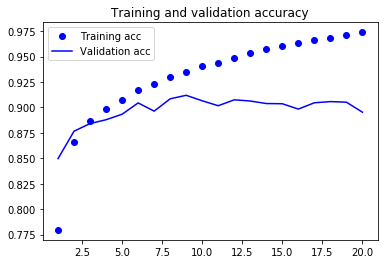

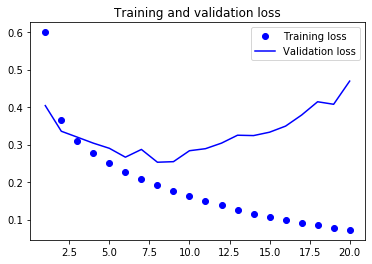

In [11]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [13]:
test_loss, test_acc = model1.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.8947


##### Results

With this first convolutional network model, we already have achieved a slightly higher accuracy than we did in the previous coursework after a lot of hyper-parameter tuning. This accuracy is still not very high, but it is a good starting point.

We can see in the graphs that the model overfits somewhere around 8 epochs. If we were to train this network again, 10 epochs would be more than enough, saving us lot of time. 

#### Model 2

In this second model, we are going to try with a slightly different network architecture, changing the number of nodes in the last Conv2D layer.


##### Build

In [7]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [8]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [9]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

##### Compilation

In [10]:
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

Even though overfitting can depend on model parameters, I've reduced the epochs in the training of this second model to 15 because overfitting will most likely happen before this number is reached, and this will save us some valuable time. If this is not the case, I will retrain the model with a higher number of epochs.

In [17]:
history2 = model2.fit(partial_images, 
          partial_labels, 
          epochs=15, 
          batch_size=64,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/15
40000/40000 [==============================] - 44s 1ms/sample - loss: 0.5889 - accuracy: 0.7815 - val_loss: 0.3867 - val_accuracy: 0.8582
Epoch 2/15
40000/40000 [==============================] - 39s 972us/sample - loss: 0.3560 - accuracy: 0.8702 - val_loss: 0.3401 - val_accuracy: 0.8790
Epoch 3/15
40000/40000 [==============================] - 39s 968us/sample - loss: 0.2966 - accuracy: 0.8914 - val_loss: 0.3099 - val_accuracy: 0.8866
Epoch 4/15
40000/40000 [==============================] - 39s 969us/sample - loss: 0.2608 - accuracy: 0.9044 - val_loss: 0.2708 - val_accuracy: 0.9029
Epoch 5/15
40000/40000 [==============================] - 40s 1ms/sample - loss: 0.2338 - accuracy: 0.9137 - val_loss: 0.2590 - val_accuracy: 0.9038
Epoch 6/15
40000/40000 [==============================] - 40s 1ms/sample - loss: 0.2112 - accuracy: 0.9240 - val_loss: 0.2693 - val_accuracy: 0.9054
Epoch 7/15
40000/40000 [==========================

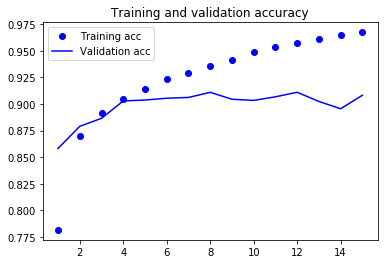

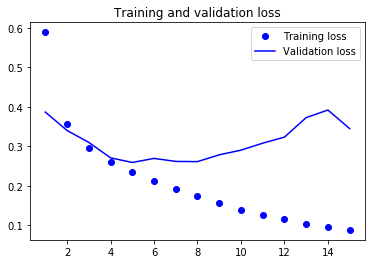

In [18]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [20]:
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.9105


##### Results

This second network obtained an approximate 1.5% accuracy increase from the previous one. As expected, it also overfitted around 8 epochs.

#### Model 3

In this third model, we will continue experimenting with the network's architecture, as we obtained positive results in the second model. We will increase the number of nodes in all three layers.

##### Build

In [7]:
model3 = models.Sequential()
model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [8]:
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

In [9]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                7

##### Compilation

In [10]:
model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

Once again, I've decreased the number of epochs, this time to 10, because the size of this network will significantly slow down its training and the model will most likely overfit before reaching 10 epochs.

In [11]:
history3 = model3.fit(partial_images, 
          partial_labels, 
          epochs=10, 
          batch_size=64,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/10
40000/40000 [==============================] - 94s 2ms/sample - loss: 0.5537 - accuracy: 0.7970 - val_loss: 0.3883 - val_accuracy: 0.8594
Epoch 2/10
40000/40000 [==============================] - 93s 2ms/sample - loss: 0.3289 - accuracy: 0.8795 - val_loss: 0.3020 - val_accuracy: 0.8905
Epoch 3/10
40000/40000 [==============================] - 101s 3ms/sample - loss: 0.2742 - accuracy: 0.9005 - val_loss: 0.2794 - val_accuracy: 0.8985
Epoch 4/10
40000/40000 [==============================] - 95s 2ms/sample - loss: 0.2399 - accuracy: 0.9114 - val_loss: 0.2587 - val_accuracy: 0.9068
Epoch 5/10
40000/40000 [==============================] - 94s 2ms/sample - loss: 0.2093 - accuracy: 0.9236 - val_loss: 0.2761 - val_accuracy: 0.8993
Epoch 6/10
40000/40000 [==============================] - 96s 2ms/sample - loss: 0.1828 - accuracy: 0.9322 - val_loss: 0.2674 - val_accuracy: 0.9046
Epoch 7/10
40000/40000 [==============================]

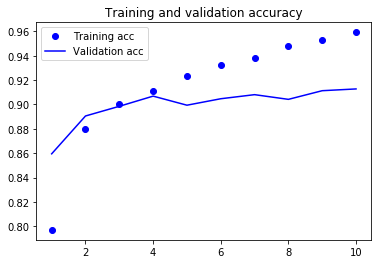

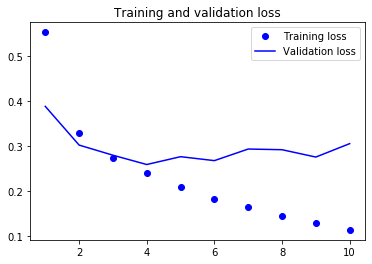

In [13]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [12]:
test_loss, test_acc = model3.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.9052


##### Results

This time increasing the number of nodes per layer did not improve the accuracy, and it slowed down the training significantly. Overfitting happened earlier, around the 4th epoch.

#### Model 4

For this model, we will use the same Conv2D and MaxPool layers that we used on model 2, and will increase the number of nodes in the first dense layer.

##### Build

In [6]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [7]:
model4.add(layers.Flatten())
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

In [8]:
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

##### Compilation

In [9]:
model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

In [10]:
history4 = model4.fit(partial_images, 
          partial_labels, 
          epochs=10, 
          batch_size=64,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/10
40000/40000 [==============================] - 49s 1ms/sample - loss: 0.5674 - accuracy: 0.7882 - val_loss: 0.3985 - val_accuracy: 0.8497
Epoch 2/10
40000/40000 [==============================] - 44s 1ms/sample - loss: 0.3453 - accuracy: 0.8734 - val_loss: 0.3260 - val_accuracy: 0.8813
Epoch 3/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 0.2898 - accuracy: 0.8942 - val_loss: 0.2957 - val_accuracy: 0.8914
Epoch 4/10
40000/40000 [==============================] - 40s 1ms/sample - loss: 0.2570 - accuracy: 0.9058 - val_loss: 0.2830 - val_accuracy: 0.8978
Epoch 5/10
40000/40000 [==============================] - 36s 902us/sample - loss: 0.2255 - accuracy: 0.9159 - val_loss: 0.2552 - val_accuracy: 0.9063
Epoch 6/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 0.2052 - accuracy: 0.9243 - val_loss: 0.2556 - val_accuracy: 0.9057
Epoch 7/10
40000/40000 [==============================

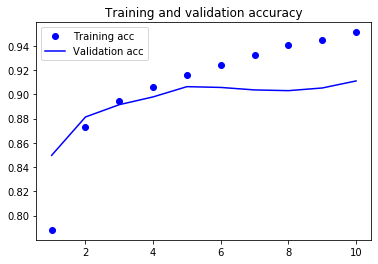

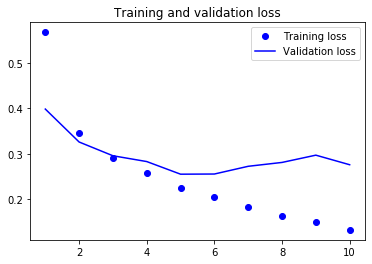

In [13]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [14]:
test_loss, test_acc = model4.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.9085


##### Results

Increasing the number of nodes in the first dense layer of the network doesn't seem to help the accuracy in this case.

#### Model 5

For this model, we will try to increase the number of nodes in the first dense layer again.

##### Build

In [14]:
model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [15]:
model5.add(layers.Flatten())
model5.add(layers.Dense(256, activation='relu'))
model5.add(layers.Dense(10, activation='softmax'))

In [16]:
model5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

##### Compilation

In [17]:
model5.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

After training the model for 10 epochs and inspecting the graphs produced, it was doubtful that the model had overfitted, so we trained it again, this time for 15 epochs.

In [18]:
history5 = model5.fit(partial_images, 
          partial_labels, 
          epochs=15, 
          batch_size=64,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/15
40000/40000 [==============================] - 48s 1ms/sample - loss: 0.5849 - accuracy: 0.7837 - val_loss: 0.3941 - val_accuracy: 0.8547
Epoch 2/15
40000/40000 [==============================] - 47s 1ms/sample - loss: 0.3467 - accuracy: 0.8733 - val_loss: 0.3690 - val_accuracy: 0.8608
Epoch 3/15
40000/40000 [==============================] - 48s 1ms/sample - loss: 0.2910 - accuracy: 0.8934 - val_loss: 0.2827 - val_accuracy: 0.8977
Epoch 4/15
40000/40000 [==============================] - 38s 959us/sample - loss: 0.2575 - accuracy: 0.9043 - val_loss: 0.2847 - val_accuracy: 0.8940
Epoch 5/15
40000/40000 [==============================] - 44s 1ms/sample - loss: 0.2317 - accuracy: 0.9152 - val_loss: 0.3426 - val_accuracy: 0.8770
Epoch 6/15
40000/40000 [==============================] - 47s 1ms/sample - loss: 0.2079 - accuracy: 0.9225 - val_loss: 0.2994 - val_accuracy: 0.8983
Epoch 7/15
40000/40000 [==============================

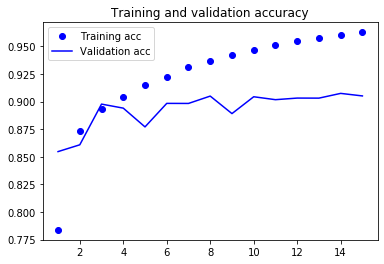

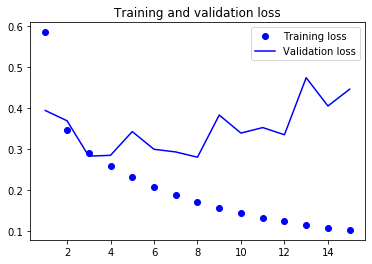

In [19]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [20]:
test_loss, test_acc = model5.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.8993


##### Results

It is obvious at this point that increasing the size of the first dense layer is not helping train our network more accurately.

#### Model 6

For the sixth model, we'll try doing the opposite. We will decrease the number of nodes of the first dense layer. 

##### Build

In [21]:
model6 = models.Sequential()
model6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [22]:
model6.add(layers.Flatten())
model6.add(layers.Dense(32, activation='relu'))
model6.add(layers.Dense(10, activation='softmax'))

In [23]:
model6.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

##### Compilation

In [24]:
model6.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

In [25]:
history6 = model6.fit(partial_images, 
          partial_labels, 
          epochs=15, 
          batch_size=64,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/15
40000/40000 [==============================] - 41s 1ms/sample - loss: 0.6099 - accuracy: 0.7758 - val_loss: 0.4100 - val_accuracy: 0.8518
Epoch 2/15
40000/40000 [==============================] - 43s 1ms/sample - loss: 0.3597 - accuracy: 0.8709 - val_loss: 0.3436 - val_accuracy: 0.8742
Epoch 3/15
40000/40000 [==============================] - 41s 1ms/sample - loss: 0.3035 - accuracy: 0.8902 - val_loss: 0.2994 - val_accuracy: 0.8891
Epoch 4/15
40000/40000 [==============================] - 40s 1ms/sample - loss: 0.2677 - accuracy: 0.9016 - val_loss: 0.2863 - val_accuracy: 0.8965
Epoch 5/15
40000/40000 [==============================] - 40s 995us/sample - loss: 0.2401 - accuracy: 0.9122 - val_loss: 0.2702 - val_accuracy: 0.8992
Epoch 6/15
40000/40000 [==============================] - 40s 1000us/sample - loss: 0.2175 - accuracy: 0.9218 - val_loss: 0.2609 - val_accuracy: 0.9064
Epoch 7/15
40000/40000 [===========================

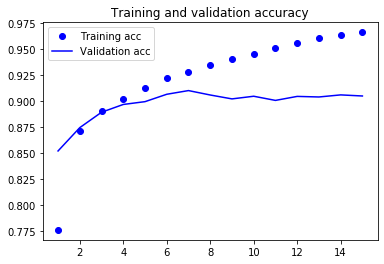

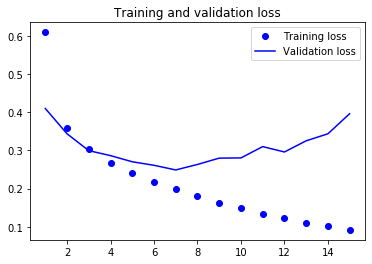

In [26]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [27]:
test_loss, test_acc = model6.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.8992


##### Results

Changing the size of the first dense layer doesn't seem to have much effect on the training in general. We will leave it at 64.

#### Model 7

In this model, we will increase the batch size.

##### Build

In [45]:
model7 = models.Sequential()
model7.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [46]:
model7.add(layers.Flatten())
model7.add(layers.Dense(64, activation='relu'))
model7.add(layers.Dense(10, activation='softmax'))

In [47]:
model7.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

##### Compilation

In [48]:
model7.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

In [52]:
history7 = model7.fit(partial_images, 
          partial_labels, 
          epochs=15, 
          batch_size=128,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/15
40000/40000 [==============================] - 40s 1ms/sample - loss: 0.6765 - accuracy: 0.7496 - val_loss: 0.4825 - val_accuracy: 0.8198
Epoch 2/15
40000/40000 [==============================] - 38s 952us/sample - loss: 0.3960 - accuracy: 0.8552 - val_loss: 0.3986 - val_accuracy: 0.8541
Epoch 3/15
40000/40000 [==============================] - 36s 897us/sample - loss: 0.3273 - accuracy: 0.8804 - val_loss: 0.3144 - val_accuracy: 0.8852
Epoch 4/15
40000/40000 [==============================] - 35s 883us/sample - loss: 0.2881 - accuracy: 0.8945 - val_loss: 0.3507 - val_accuracy: 0.8709
Epoch 5/15
40000/40000 [==============================] - 36s 899us/sample - loss: 0.2616 - accuracy: 0.9038 - val_loss: 0.2745 - val_accuracy: 0.8981
Epoch 6/15
40000/40000 [==============================] - 36s 904us/sample - loss: 0.2387 - accuracy: 0.9114 - val_loss: 0.3596 - val_accuracy: 0.8675
Epoch 7/15
40000/40000 [======================

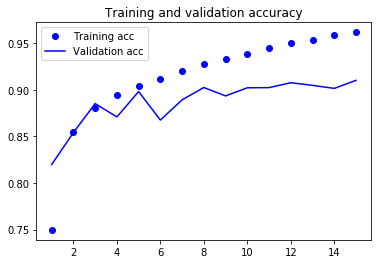

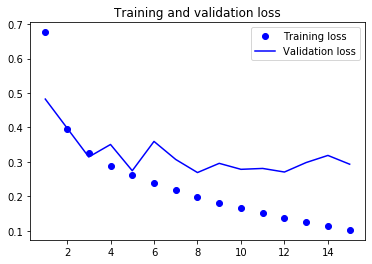

In [53]:
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [54]:
test_loss, test_acc = model7.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.9079


##### Results

Although not the highest accuracy obtained so far, 90.79% accuracy is one of the highest in the last few runs. It might be worth trying some other values of batch size.

#### Model 8

In this model we'll try an even higher value for batch size.

##### Build

In [55]:
model8 = models.Sequential()
model8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [56]:
model8.add(layers.Flatten())
model8.add(layers.Dense(64, activation='relu'))
model8.add(layers.Dense(10, activation='softmax'))

In [57]:
model8.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

##### Compilation

In [58]:
model8.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

In [59]:
history8 = model8.fit(partial_images, 
          partial_labels, 
          epochs=15, 
          batch_size=256,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/15
40000/40000 [==============================] - 36s 899us/sample - loss: 0.8531 - accuracy: 0.6825 - val_loss: 0.6497 - val_accuracy: 0.7628
Epoch 2/15
40000/40000 [==============================] - 35s 881us/sample - loss: 0.4920 - accuracy: 0.8190 - val_loss: 0.6002 - val_accuracy: 0.7869
Epoch 3/15
40000/40000 [==============================] - 35s 874us/sample - loss: 0.4005 - accuracy: 0.8536 - val_loss: 0.4006 - val_accuracy: 0.8475
Epoch 4/15
40000/40000 [==============================] - 37s 921us/sample - loss: 0.3484 - accuracy: 0.8726 - val_loss: 0.3925 - val_accuracy: 0.8584
Epoch 5/15
40000/40000 [==============================] - 35s 865us/sample - loss: 0.3151 - accuracy: 0.8855 - val_loss: 0.3385 - val_accuracy: 0.8756
Epoch 6/15
40000/40000 [==============================] - 31s 773us/sample - loss: 0.2902 - accuracy: 0.8944 - val_loss: 0.3396 - val_accuracy: 0.8712
Epoch 7/15
40000/40000 [====================

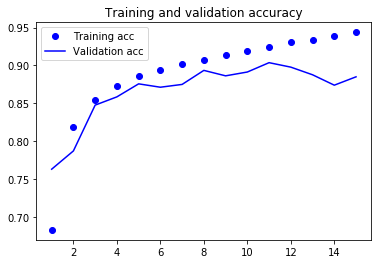

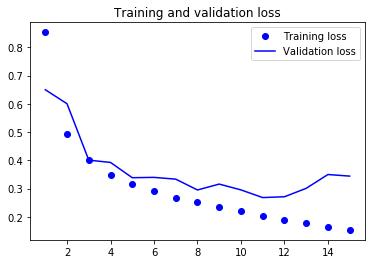

In [61]:
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']
loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [62]:
test_loss, test_acc = model8.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.8862


##### Results

Batch size of 256 was unsuccesful in gaining accuracy, as it went down to 88.62%.

#### Model 9

Increasing the batch size proved unsuccesful, so for this model we will decrease it.

##### Build

In [63]:
model9 = models.Sequential()
model9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [64]:
model9.add(layers.Flatten())
model9.add(layers.Dense(64, activation='relu'))
model9.add(layers.Dense(10, activation='softmax'))

In [65]:
model9.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

##### Compilation

In [66]:
model9.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

In [67]:
history9 = model9.fit(partial_images, 
          partial_labels, 
          epochs=15, 
          batch_size=32,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/15
40000/40000 [==============================] - 41s 1ms/sample - loss: 0.5224 - accuracy: 0.8087 - val_loss: 0.3466 - val_accuracy: 0.8748
Epoch 2/15
40000/40000 [==============================] - 40s 1ms/sample - loss: 0.3284 - accuracy: 0.8826 - val_loss: 0.3030 - val_accuracy: 0.8858
Epoch 3/15
40000/40000 [==============================] - 41s 1ms/sample - loss: 0.2774 - accuracy: 0.8980 - val_loss: 0.2921 - val_accuracy: 0.8932
Epoch 4/15
40000/40000 [==============================] - 38s 956us/sample - loss: 0.2490 - accuracy: 0.9100 - val_loss: 0.2753 - val_accuracy: 0.9026
Epoch 5/15
40000/40000 [==============================] - 39s 985us/sample - loss: 0.2252 - accuracy: 0.9190 - val_loss: 0.2738 - val_accuracy: 0.9003
Epoch 6/15
40000/40000 [==============================] - 41s 1ms/sample - loss: 0.2084 - accuracy: 0.9247 - val_loss: 0.2862 - val_accuracy: 0.8999
Epoch 7/15
40000/40000 [============================

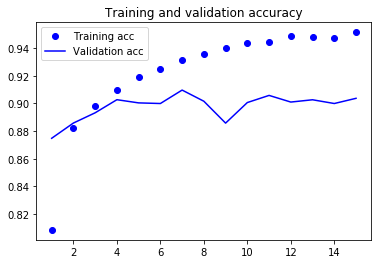

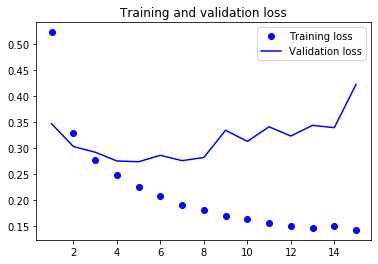

In [68]:
acc = history9.history['accuracy']
val_acc = history9.history['val_accuracy']
loss = history9.history['loss']
val_loss = history9.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [69]:
test_loss, test_acc = model9.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.9017


##### Results

Again, the accuracy remains around 90%. Decreasing the batch size also proved unsuccesful. So far we have seen very little variation in our results from hyper-paramter tuning.

#### Model 10

In this model we will add two dropout layers.

##### Build

In [70]:
model10 = models.Sequential()
model10.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Dropout(0.25))
model10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Dropout(0.25))
model10.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [71]:
model10.add(layers.Flatten())
model10.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dense(10, activation='softmax'))

In [72]:
model10.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 128)        

##### Compilation

In [73]:
model10.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

In [74]:
history10 = model10.fit(partial_images, 
          partial_labels, 
          epochs=15, 
          batch_size=64,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/15
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.6383 - accuracy: 0.7614 - val_loss: 0.4243 - val_accuracy: 0.8422
Epoch 2/15
40000/40000 [==============================] - 47s 1ms/sample - loss: 0.4022 - accuracy: 0.8519 - val_loss: 0.3436 - val_accuracy: 0.8753
Epoch 3/15
40000/40000 [==============================] - 48s 1ms/sample - loss: 0.3451 - accuracy: 0.8737 - val_loss: 0.3127 - val_accuracy: 0.8835
Epoch 4/15
40000/40000 [==============================] - 47s 1ms/sample - loss: 0.3115 - accuracy: 0.8855 - val_loss: 0.2932 - val_accuracy: 0.8916
Epoch 5/15
40000/40000 [==============================] - 46s 1ms/sample - loss: 0.2892 - accuracy: 0.8945 - val_loss: 0.2818 - val_accuracy: 0.8944
Epoch 6/15
40000/40000 [==============================] - 46s 1ms/sample - loss: 0.2759 - accuracy: 0.8974 - val_loss: 0.2855 - val_accuracy: 0.8941
Epoch 7/15
40000/40000 [==============================] 

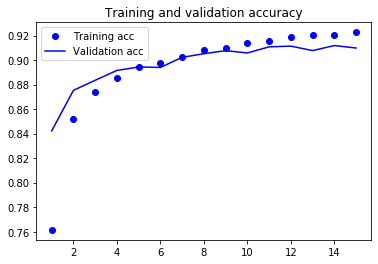

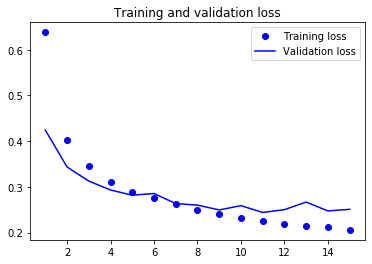

In [75]:
acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']
loss = history10.history['loss']
val_loss = history10.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [76]:
test_loss, test_acc = model10.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.9084


##### Results

Again, a very similar result to the previous models.

#### Model 11

In this model, we will add a third dropout layer and will change the dropout value.

##### Build

In [77]:
model11 = models.Sequential()
model11.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model11.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Dropout(0.5))
model11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model11.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Dropout(0.5))
model11.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [78]:
model11.add(layers.Flatten())
model11.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dropout(0.5))
model11.add(layers.Dense(10, activation='softmax'))

In [79]:
model11.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

##### Compilation

In [80]:
model11.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

In [81]:
history11 = model11.fit(partial_images, 
          partial_labels, 
          epochs=15, 
          batch_size=64,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/15
40000/40000 [==============================] - 41s 1ms/sample - loss: 0.5856 - accuracy: 0.7830 - val_loss: 0.3854 - val_accuracy: 0.8589
Epoch 2/15
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.3516 - accuracy: 0.8709 - val_loss: 0.3359 - val_accuracy: 0.8773
Epoch 3/15
40000/40000 [==============================] - 45s 1ms/sample - loss: 0.2935 - accuracy: 0.8916 - val_loss: 0.3033 - val_accuracy: 0.8857
Epoch 4/15
40000/40000 [==============================] - 44s 1ms/sample - loss: 0.2588 - accuracy: 0.9049 - val_loss: 0.2792 - val_accuracy: 0.9006
Epoch 5/15
40000/40000 [==============================] - 40s 988us/sample - loss: 0.2320 - accuracy: 0.9154 - val_loss: 0.2851 - val_accuracy: 0.8946
Epoch 6/15
40000/40000 [==============================] - 40s 988us/sample - loss: 0.2089 - accuracy: 0.9226 - val_loss: 0.2665 - val_accuracy: 0.9057
Epoch 7/15
40000/40000 [============================

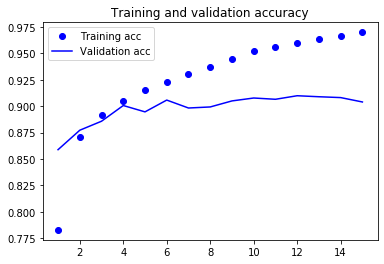

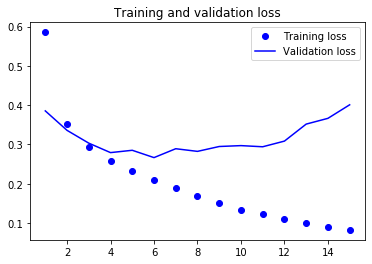

In [82]:
acc = history11.history['accuracy']
val_acc = history11.history['val_accuracy']
loss = history11.history['loss']
val_loss = history11.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [83]:
test_loss, test_acc = model11.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.8993


##### Results

No change in the accuracy test results.

#### Model 12

At this point, the changes we are making to the models' hyper-parameters don't seem to be making much impact on the training. This will be the last model we create, and for it, we will add 3 different dropout layers with different values, in hope to get some change in the test results. 

##### Build

In [85]:
model12 = models.Sequential()
model12.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model12.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Dropout(0.15))
model12.add(layers.Conv2D(64, (3, 3), activation='relu'))
model12.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Dropout(0.15))
model12.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [86]:
model12.add(layers.Flatten())
model12.add(layers.Dense(64, activation='relu'))
model10.add(layers.Dropout(0.5))
model12.add(layers.Dense(10, activation='softmax'))

In [87]:
model12.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_10 (Flatten)         (None, 1152)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)              

##### Compilation

In [88]:
model12.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Training

In [89]:
history12 = model12.fit(partial_images, 
          partial_labels, 
          epochs=15, 
          batch_size=64,
          validation_data=(val_images, val_labels))

Train on 40000 samples, validate on 20000 samples
Epoch 1/15
40000/40000 [==============================] - 40s 990us/sample - loss: 0.6121 - accuracy: 0.7747 - val_loss: 0.3983 - val_accuracy: 0.8577
Epoch 2/15
40000/40000 [==============================] - 42s 1ms/sample - loss: 0.3630 - accuracy: 0.8682 - val_loss: 0.3275 - val_accuracy: 0.8801
Epoch 3/15
40000/40000 [==============================] - 43s 1ms/sample - loss: 0.3017 - accuracy: 0.8899 - val_loss: 0.3020 - val_accuracy: 0.8859
Epoch 4/15
40000/40000 [==============================] - 42s 1ms/sample - loss: 0.2674 - accuracy: 0.9021 - val_loss: 0.2716 - val_accuracy: 0.9008
Epoch 5/15
40000/40000 [==============================] - 42s 1ms/sample - loss: 0.2383 - accuracy: 0.9123 - val_loss: 0.2761 - val_accuracy: 0.9003
Epoch 6/15
40000/40000 [==============================] - 40s 996us/sample - loss: 0.2140 - accuracy: 0.9212 - val_loss: 0.2775 - val_accuracy: 0.9014
Epoch 7/15
40000/40000 [============================

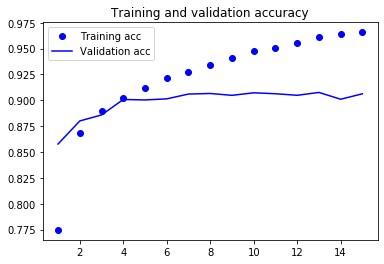

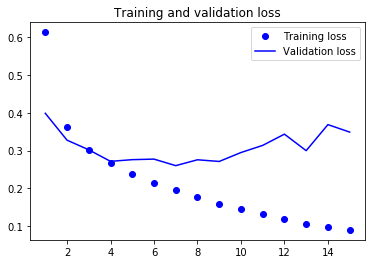

In [90]:
acc = history12.history['accuracy']
val_acc = history12.history['val_accuracy']
loss = history12.history['loss']
val_loss = history12.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### Testing

In [91]:
test_loss, test_acc = model12.evaluate(test_images, test_labels, verbose=0)
print('test_acc:', test_acc)

test_acc: 0.9037


##### Results

About 90% accuracy once again.

## Results

The test results from the different models have been recorded on the table below for easier visualization.

|Run | Convolutional Layers | Dense Layers | Batch Size | Dropout | Test Accuracy 
|:--:|:-----:|:----:|:----:|:----:|:----:|
| 1 | 32, 64, 64 | 64, 10 | 64 | - | 0.8947
| 2 | 32, 64, 128 | 64, 10 | 64 | - | 0.9105 
| 3 | 64, 128, 128 | 64, 10 | 64 | - | 0.9052
| 4 | 32, 64, 128 | 128, 10 | 64 | - | 0.9085
| 5 | 32, 64, 128 | 256, 10 | 64 | - | 0.8993
| 6 | 32, 64, 128 | 32, 10 | 64 | - | 0.8992
| 7 | 32, 64, 128 | 64, 10 | 128 | - | 0.9079
| 8 | 32, 64, 128 | 64, 10 | 256 | - | 0.8862
| 9 | 32, 64, 128 | 64, 10 | 32 | - | 0.9017
| 10 | 32, 64, 128 | 64, 10 | 64 | 2 Layers (0.25) | 0.9084
| 11 | 32, 64, 128 | 64, 10 | 64 | 3 Layers (0.5) | 0.8993
| 12 | 32, 64, 128 | 64, 10 | 64 | 3 Layers (0.15, 0.15, 0.5) | 0.9037

As we can see on the table, the test results from the different models created are similar. There is really little variation in the accuracy that these models obtain, which makes it seem like the changes made to the hyper-parameters do not really matter almost at all.

## Evaluation

I have found the results from the accuracy tests very surprising for a couple of reasons. First, is the fact that the hyper-parameter tweaking made almost no change in these results. This is a very big change from our previous coursework, where we were able to really make a difference in the training by finding the optimum parameter settings, which makes this quite unexpected. Secondly, the accuracy obtained was not as high as expected. A 2% accuracy increase could be a significant change in certain situations, but it is a relatively small improvement.

Although almost all the convolutional network models we created and tested in this coursework obtained a better accuracy than our most successful densely connected model, the accuracy obtained is still not ideal. Therefore, we can say that a convolutional network is indeed a better model for the Fashion-MNIST database than a densely connected network, but there is still much room for improvement. Even with over 91% accuracy, this model is still not reliable enough to use in a real-life scenario.